## Churn prediction (ML & Python)


The model will use Simple Linear Regression to predict sales based on advertising spend.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Step 1: Generate Synthetic Data with Outliers
np.random.seed(42)
n_samples = 200

tenure = np.random.randint(1, 60, n_samples).tolist()  # Customer tenure in months
monthly_spend = np.random.uniform(20, 100, n_samples).tolist()  # Monthly spend in $
customer_support_calls = np.random.randint(0, 10, n_samples).tolist()  # Support calls


In [24]:
# Adding outliers
tenure.extend([0, 120, 130])  # Extreme low and high values
monthly_spend.extend([5, 200, 250])  # Very low and very high spenders
customer_support_calls.extend([25, 30, 35])  # Excessive support calls

In [25]:
# Simulating churn probability (higher tenure -> lower churn)
# Customers with longer tenure are less likely to churn
churn_prob = np.clip(1 - (np.array(tenure) / 100 + np.random.normal(0, 0.1, len(tenure))), 0, 1)

In [26]:
# Create DataFrame
data = pd.DataFrame({
    'Tenure': tenure,
    'Monthly Spend': monthly_spend,
    'Support Calls': customer_support_calls,
    'Churn Probability': churn_prob
})

In [27]:
# Step 2: Exploratory Data Analysis
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Tenure               0
Monthly Spend        0
Support Calls        0
Churn Probability    0
dtype: int64


In [28]:
# Summary statistics
print("\nSummary statistics:\n", data.describe())


Summary statistics:
            Tenure  Monthly Spend  Support Calls  Churn Probability
count  203.000000     203.000000     203.000000         203.000000
mean    29.990148      60.695309       4.980296           0.696119
std     19.251331      28.335611       4.308592           0.202678
min      0.000000       5.000000       0.000000           0.000000
25%     15.000000      40.414824       2.000000           0.560790
50%     29.000000      56.581213       4.000000           0.704865
75%     44.000000      77.421401       8.000000           0.850554
max    130.000000     250.000000      35.000000           1.000000


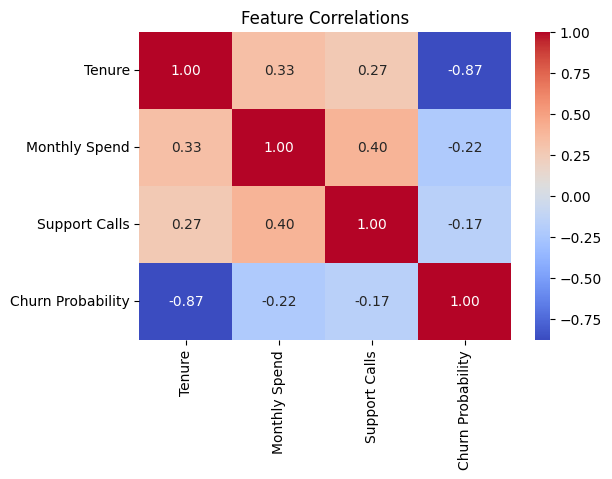

In [29]:
# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

## Distribution of numerical features - helps visualize relationships between numerical features. Histograms with KDE (Kernel Density Estimation) Line

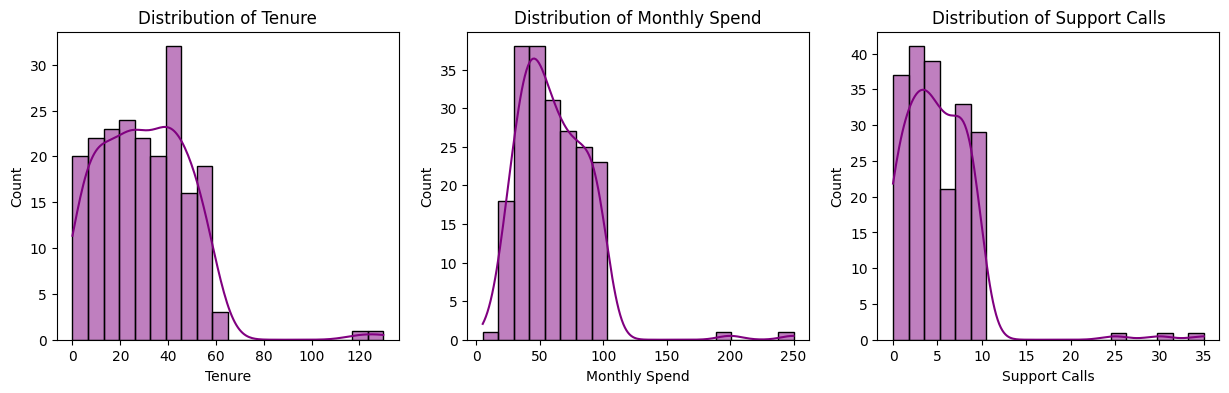

In [86]:
# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data['Tenure'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Tenure")
sns.histplot(data['Monthly Spend'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Monthly Spend")
sns.histplot(data['Support Calls'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Support Calls")
plt.show()

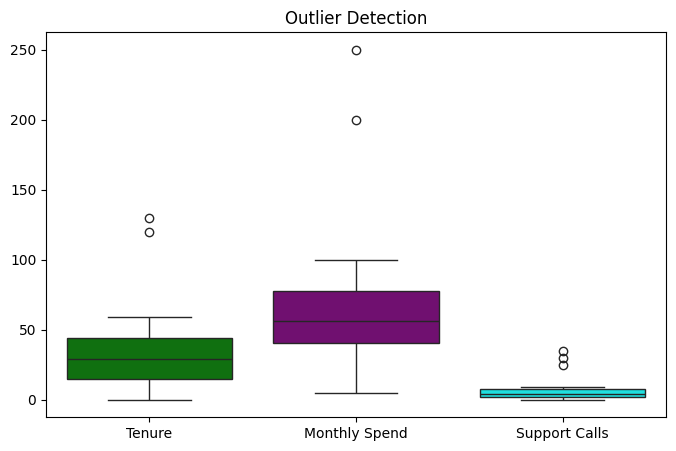

In [89]:
#Boxplot for potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['Tenure', 'Monthly Spend', 'Support Calls']])
plt.title("Outlier Detection")
plt.show()

In [32]:
# Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier count per feature:\n", outliers)


Outlier count per feature:
 Tenure               2
Monthly Spend        2
Support Calls        3
Churn Probability    2
dtype: int64


In [42]:
# Removing outliers based on IQR
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
data_cleaned.describe()

,Tenure,Monthly Spend,Support Calls,Churn Probability
count,200.000000,200.000000,200.00000,200.000000
mean,29.190000,59.330738,4.60500,0.701561
std,16.735119,22.802489,3.00234,0.190614
min,1.000000,20.041630,0.00000,0.231622
25%,15.000000,40.455690,2.00000,0.565063
50%,28.500000,56.551989,4.00000,0.706113
75%,43.250000,77.028137,7.00000,0.849812
max,59.000000,99.819239,9.00000,1.000000


## Each subplot in the pairplot shows a scatterplot of two features.
The diagonal (KDE plots) show the distribution of a single feature.
Outliers appear as isolated points away from the main trend.

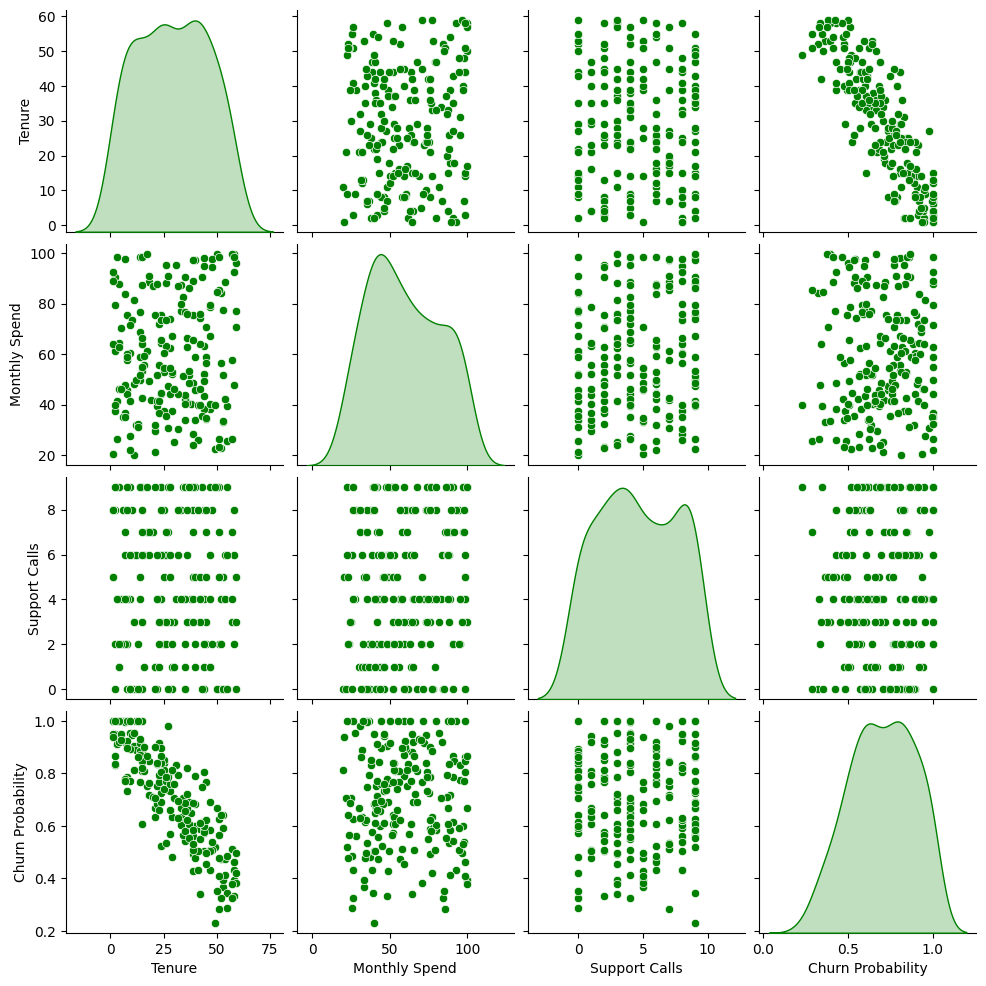

In [88]:
# Pairplot for feature relationships
custom_palette = ["green", "purple", "cyan"]  # Bright colors

sns.set_palette(custom_palette)

sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()


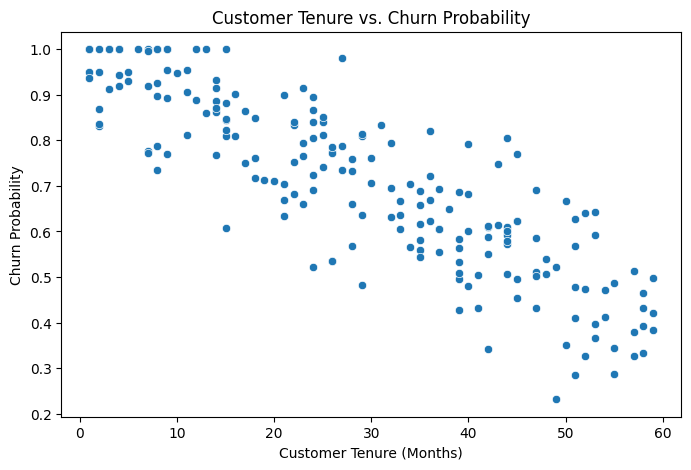

In [46]:
# Scatter plot for relationship between tenure and churn probability
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_cleaned['Tenure'], y=data['Churn Probability'])
plt.xlabel("Customer Tenure (Months)")
plt.ylabel("Churn Probability")
plt.title("Customer Tenure vs. Churn Probability")
plt.show()

In [47]:
# Step 3: Preprocessing
X = data_cleaned[['Tenure']]
y = data_cleaned['Churn Probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predictions
y_pred = model.predict(X_test)

In [50]:
# Step 5: Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.1129
R² Score: 0.6211


## Model Interpretation
## Impact of Outlier Removal on Model Performance
Before Removing Outliers (R² = 0.7)
The extreme values may have artificially increased correlation.
The model could have been fitting to those extreme points, improving R² but making it less generalizable.
After Removing Outliers (R² = 0.6)
The model now learns from a cleaner dataset without extreme influences.
The reduced R² suggests that churn probability is less predictable using tenure alone.
This is a sign that we need more features (e.g., Monthly Spend, Support Calls) for better prediction.

## Residual Plot ;
Checks how well the regression model fits. Ideally, residuals should be randomly scattered around zero.
X-axis: Actual values.
Y-axis: Differences between actual and predicted values (residuals).
Good Model means residuals should be randomly scattered around 0.
If a pattern occurs (e.g., funnel shape), it indicates that the model struggles with certain ranges.

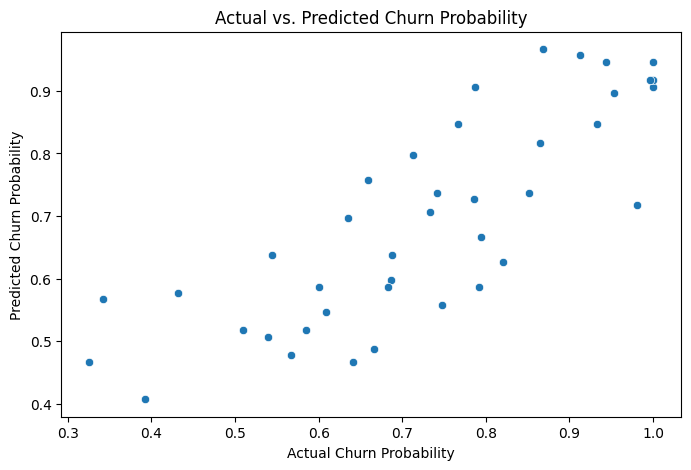

In [51]:
# Plot Predictions vs Actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Churn Probability")
plt.ylabel("Predicted Churn Probability")
plt.title("Actual vs. Predicted Churn Probability")
plt.show()

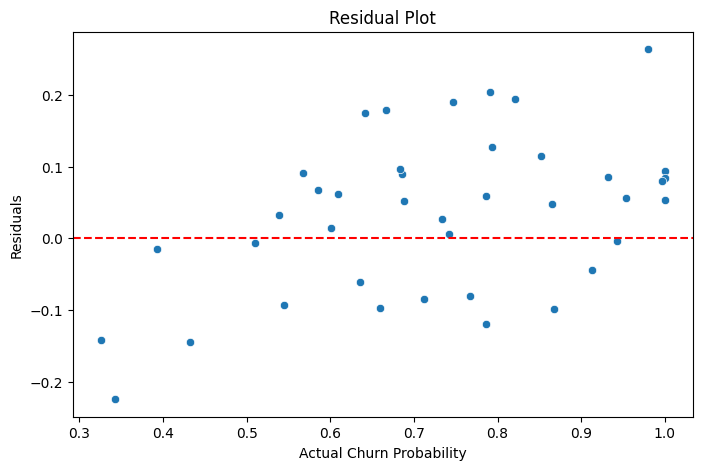

In [52]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual Churn Probability")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Next Steps may be :
1. to train a multiple regression model (using Tenure, Monthly Spend and Support Calls , to improve accuracy
2. Analyze residuals  more deeply to check if we have patters indicating a non-linear relationship


## continued with multiple regression

1. Updating Feature Selection: Changed X to include multiple columns, 2.Retraining the Model: Using LinearRegression() as before, but with multiple features., 3.Evaluating Performance: By comparing R² and RMSE with the previous single-variable model.

In [53]:
X = data_cleaned[['Tenure', 'Monthly Spend', 'Support Calls']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.1162
R² Score: 0.5984


## To visualize the impact of each feature, we can examine the regression coefficients (weights) assigned by the model. This tells us how much each feature contributes to the prediction.

In [55]:
# Print regression coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Importance (Regression Coefficients):\n", coefficients)


Feature Importance (Regression Coefficients):
                Coefficient
Tenure           -0.009995
Monthly Spend     0.000570
Support Calls    -0.000267


## These regression coefficients indicate how each feature affects churn probability:

Tenure (-0.009995)

Negative coefficient: Longer tenure reduces churn probability.
Interpretation: For every 1 month increase in tenure, churn probability decreases by ~0.01 (or 1%).
Monthly Spend (+0.000570)

Small positive coefficient: Higher spending slightly increases churn probability.
This is unexpecte and may indicate that higher-spending customers are not necessarily loyal.
Support Calls (-0.000267)

Very small negative coefficient:  More support calls very slightly reduce churn.
Likely not significant, meaning support calls have almost no effect on churn.

## Let us test polynomial regression to capture nonlinear effects, also check the feature significance with p-values

#### A. Checking Feature Significance with P-values
To assess whether Tenure, Monthly Spend, and Support Calls significantly impact churn probability, we'll use Ordinary Least Squares (OLS) regression from statsmodels. This will provide p-values to determine significance.

Interpreting P-values:

P-value < 0.05 → The feature is statistically significant.

P-value > 0.05 → The feature is not significantly impacting churn.

R² Score (in output) tells us how well the model explains churn probability.

In [58]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X = data[['Tenure', 'Monthly Spend', 'Support Calls']]
X = sm.add_constant(X)  # Adds the intercept term
y = data['Churn Probability']

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Churn Probability   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     224.4
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.41e-63
Time:                        10:55:45   Log-Likelihood:                 186.45
No. Observations:                 203   AIC:                            -364.9
Df Residuals:                     199   BIC:                            -351.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9439      0.017     54.218

## B. Testing Polynomial Regression
If we suspect that there is a nonlinear relationship (e.g., tenure vs. churn may not be perfectly linear), we can try Polynomial Regression. 

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform features to include squared terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Tenure', 'Monthly Spend', 'Support Calls']])

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Polynomial Regression R² Score: {r2_poly:.4f}")


Polynomial Regression R² Score: 0.7765


## If OLS p-values show insignificant predictors, we might drop them.
Because the Polynomial Regression R² improved, we confirm nonlinearity. This suggests a nonlinear relationship between features and churn probability.
Let us check the Feature Importance again

In [60]:
# Display polynomial feature coefficients
feature_names = poly.get_feature_names_out(['Tenure', 'Monthly Spend', 'Support Calls'])
coefficients = poly_model.coef_

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.6f}")


Tenure: -0.009457
Monthly Spend: -0.000088
Support Calls: -0.001689
Tenure^2: -0.000014
Tenure Monthly Spend: 0.000013
Tenure Support Calls: -0.000051
Monthly Spend^2: -0.000003
Monthly Spend Support Calls: 0.000054
Support Calls^2: 0.000080


## Insights from the Coefficients

- **Tenure (-0.0095)** → Longer tenure **reduces** churn probability.  
- **Monthly Spend (-0.000088)** → Spending slightly **decreases** churn, but the effect is **very weak**.  
- **Support Calls (-0.0017)** → More support calls **increase** churn slightly (negative correlation).  



***Linear Terms (Baseline Effects)
Tenure (-0.0095) → Longer tenure reduces churn probability.
Monthly Spend (-0.000088) → Spending slightly decreases churn, but the effect is very weak.
Support Calls (-0.0017) → More support calls increase churn slightly (negative correlation).

***Quadratic Terms (Nonlinear Effects)
Tenure² (-0.000014) → A very small negative effect, meaning as tenure grows, churn probability drops at a slower rate (diminishing returns).
Monthly Spend² (-0.000003) → Weak negative effect, suggesting very high spenders might churn less.
Support Calls² (+0.000080) → Strongest nonlinear effect! More calls → exponentially higher churn risk.

***Interaction Terms (Combined Effects)
Tenure × Monthly Spend (+0.000013) → Very weak positive correlation; tenure and spend together slightly increase churn.
Tenure × Support Calls (-0.000051) → More tenure & more calls lower churn (possibly loyal customers calling frequently but not leaving).
Monthly Spend × Support Calls (+0.000054) → More spending + more support calls = higher churn risk (frustrated high-spending customers).

# Visualize Relationships

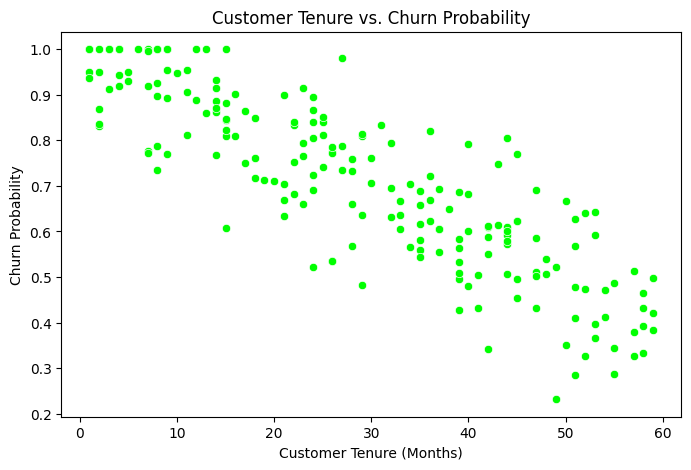

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_cleaned['Tenure'], y=data_cleaned['Churn Probability'], color='lime')  # Bright green
plt.xlabel("Customer Tenure (Months)")
plt.ylabel("Churn Probability")
plt.title("Customer Tenure vs. Churn Probability")
plt.show()


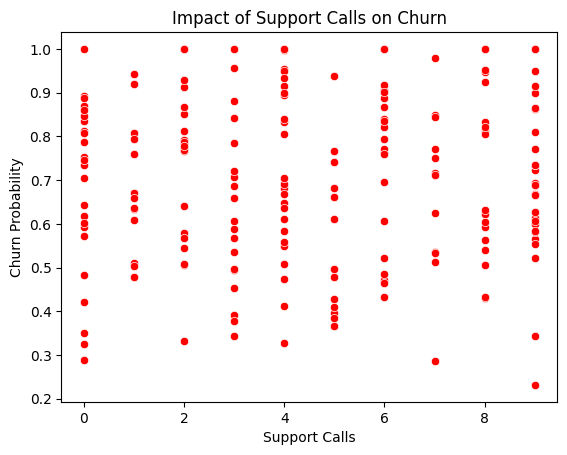

In [76]:
sns.scatterplot(x=data_cleaned['Support Calls'], y=data_cleaned['Churn Probability'], color='red')
plt.xlabel("Support Calls")
plt.ylabel("Churn Probability")
plt.title("Impact of Support Calls on Churn")
plt.show()
##  Plot churn vs. support calls to confirm the quadratic effect

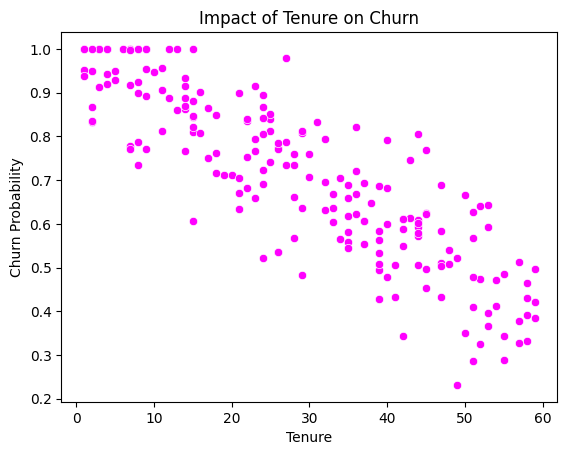

In [77]:
sns.scatterplot(x=data_cleaned['Tenure'], y=data_cleaned['Churn Probability'], color='magenta')
plt.xlabel("Tenure")
plt.ylabel("Churn Probability")
plt.title("Impact of Tenure on Churn")
plt.show()


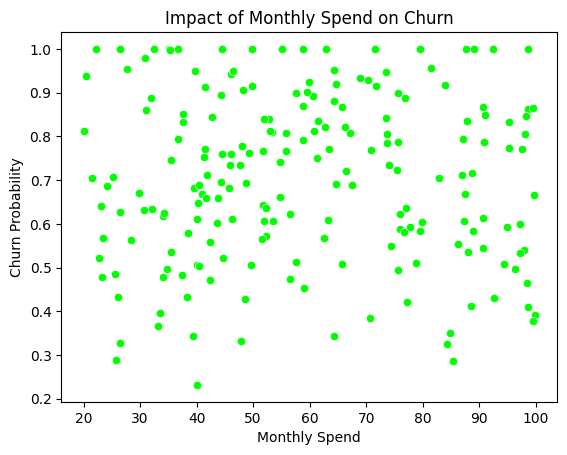

In [80]:
sns.scatterplot(x=data_cleaned['Monthly Spend'], y=data_cleaned['Churn Probability'], color='lime')
plt.xlabel("Monthly Spend")
plt.ylabel("Churn Probability")
plt.title("Impact of Monthly Spend on Churn")
plt.show()


## *CONCLUSION*

## Support Calls² is the biggest red flag – More calls exponentially increase churn risk.
## Tenure reduces churn but not in a simple straight-line way (diminishing returns).
## High spenders who call support a lot are at risk → Consider customer service improvements.